# Лабораторная работа № 306
#### Температурная зависимость намагниченности


Введём параметры установки:

In [15]:
d = 20.2 # мм 
D = 29.8 # мм
h = 5.2 # мм
N1 = 300
N2 = 400
R1 = 62 # Ом
R2 = 25 # кОм
C = 2 # мкФ
Cx = 0.17 # В/дел
Cy = 0.02 # В/дел
S = 25 ## мм*мм

### Упражнение 1. Получение петли гистерзиса и определение магнитных параметров образца при комнатной температуре
![title](petlya.png)



Рассчитаем значения коэрцитивной силы $H_c$, насыщающего поля $H_s$, остаточной индукции $B_r$, индукции насыщения образца $B_s$ по формулам:
$$H=\frac{n_1C_xx}{R_1}$$
&nbsp;
$$B=\frac{R_2CC_yy}{N_2S_{obr}}$$

In [24]:
OA = 3.5
OB = 23
OC = 11
OD = 18

In [30]:
Hc = N1 * Cx * OA / R1 # А/м
Hs = N1 * Cx * OB / R1 # А/м
Br = 100 * R2 * C * Cy * OC / (N2 * S) # Тл
Bs = 100 * R2 * C * Cy * OD / N2 / S # Тл
sig_Hc = 0.8 # А/м
sig_Hs = 0.8 # А/м
sig_Br = 0.011 # Тл
sig_Bs = 0.011 # Тл
print(f'Hc = {Hc:.1f} \u00B1 {sig_Hc:.1f} \nBr = {Br:.3f} \u00B1 {sig_Br:.3f} \nBs = {Bs:.3f} \u00B1 {sig_Bs:.3f} \nHc = {Hs:.1f} \u00B1 {sig_Hs:.1f}')


Hc = 2.9 ± 0.8 
Br = 0.110 ± 0.011 
Bs = 0.180 ± 0.011 
Hc = 18.9 ± 0.8


### Упражнение 2. Измерение зависимости индукции насыщения ферромагнитного образца от температуры и определение точки Кюри
Построить график зависимости $B_s$ от температуры $T$. Эктраполируя кривую $B_s = f(T)$ к значениям $T$, при которых $B = 0$, определить точку Кюри $T_c$.
&nbsp;
&nbsp;

Запишем результаты измерения для температуры $T$ и $OD$.

In [38]:
import numpy as np
OD_arr = np.array([18, 17, 16, 15, 15, 14, 13, 12, 11, 10, 9, 8, 8, 5, 3, 1, 0]) 
OD_sig = 1 # дел
T = np.array([20, 30, 40, 48, 56, 70, 80, 90, 100, 105, 110, 115, 120, 125, 128, 130, 135]) 
T += 273 # К
sig_T = T * 0.01
Bs_arr = 100 * R2 * C * Cy * OD_arr / N2 / S # Тл
Bs_sig = ([0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.010, 0.010, 0.010, 0.010, 0.010, 0.010, 0.010, 0])

Построим таблицы данных, полученных экспериментально и посчитанных 

In [41]:
import pandas as pd
data = pd.DataFrame({'T' : T, 'sig_T' : sig_T, 'Bs' : Bs_arr, 'sig_Bs' : Bs_sig})
print(data)

      T  sig_T    Bs  sig_Bs
0   293   2.93  0.18   0.011
1   303   3.03  0.17   0.011
2   313   3.13  0.16   0.011
3   321   3.21  0.15   0.011
4   329   3.29  0.15   0.011
5   343   3.43  0.14   0.011
6   353   3.53  0.13   0.011
7   363   3.63  0.12   0.011
8   373   3.73  0.11   0.011
9   378   3.78  0.10   0.010
10  383   3.83  0.09   0.010
11  388   3.88  0.08   0.010
12  393   3.93  0.08   0.010
13  398   3.98  0.05   0.010
14  401   4.01  0.03   0.010
15  403   4.03  0.01   0.010
16  408   4.08  0.00   0.000


Построим график зависимости $B_s = f(T)$

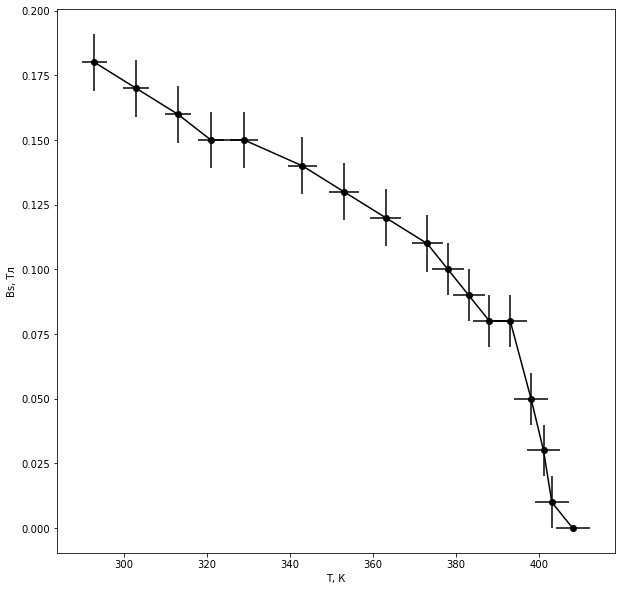

In [57]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.errorbar(T, Bs_arr, xerr=sig_T, yerr=Bs_sig, color='black', fmt='-o')
plt.ylabel('Bs, Тл', color='black')
plt.xlabel('T, К', color='black')
plt.show()

Нам нужно воспользоваться методом наименьших квадратов в том месте, где график является линейным. Выделим под эту часть графика отдельный массив.

In [86]:
from numpy import linalg as LA
Bs_mnk = Bs_arr[12:16]
T_mnk = T[12:16]
A = np.vstack([T_mnk, np.ones(len(T_mnk))]).T
a, b = np.linalg.lstsq(A, Bs_mnk, rcond=None)[0]
print(f'a = {a} Тл/К, b = {b} Тл/К')

a = -0.006828193832599157 Тл/К, b = 2.765242290748913 Тл/К


С помощью полученных коэффициентов вычислим температуру Кюри $$T_c=\frac{b}{a}$$

In [83]:
Tc = np.abs(b / a) - 273
print(f'Tc = {Tc:.2f} К')

Tc = 131.97 К
